In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = list(uploaded.keys())[0]

# Read the Excel file
df= pd.read_excel(file_name)

df.describe()



Saving cust_seg.xlsx to cust_seg.xlsx


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

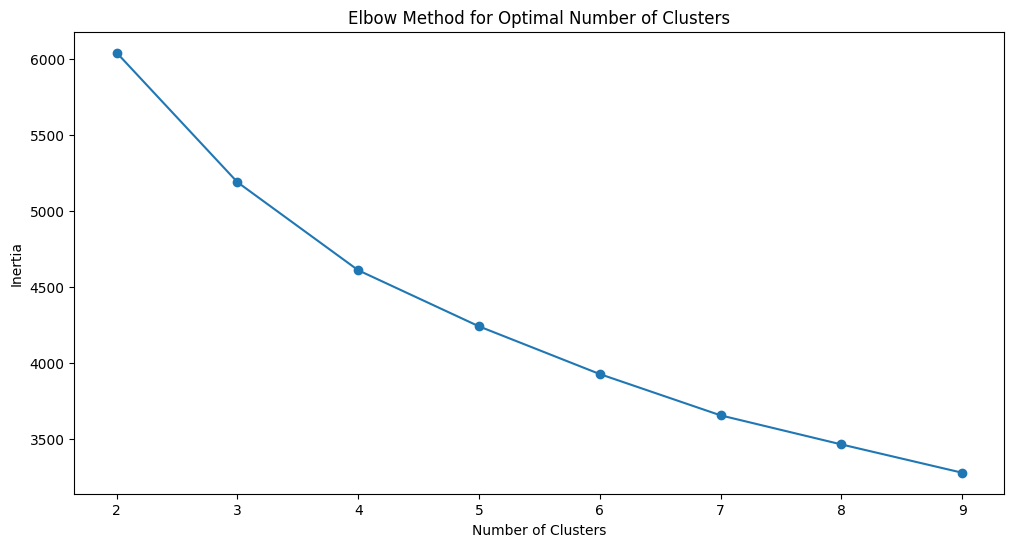

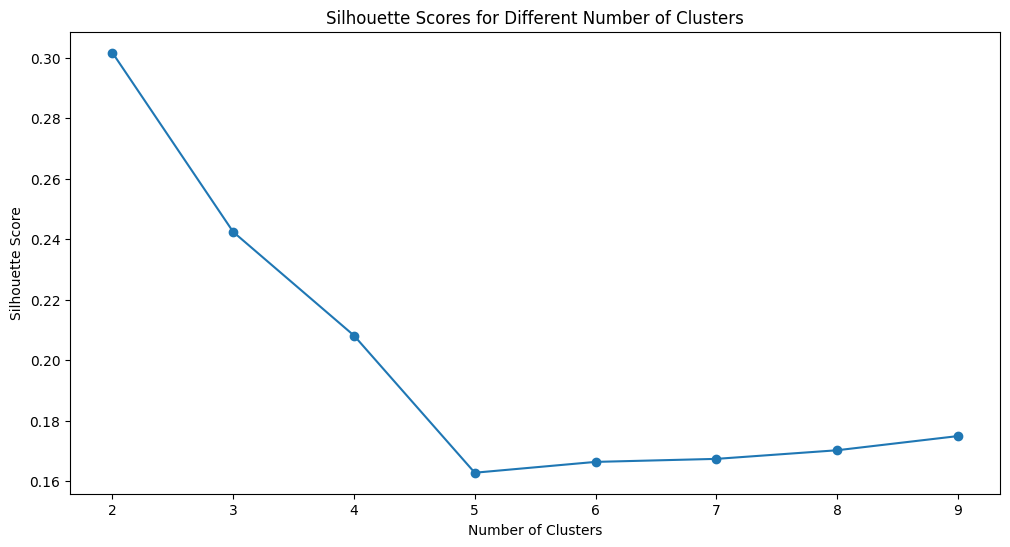

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Handling missing values: replacing NaNs with median for simplicity
df['Defaulted'].fillna(df['Defaulted'].median(), inplace=True)

# Selecting features for clustering (excluding 'Customer Id' as it's not relevant for clustering)
features = df.drop(['Customer Id'], axis=1)

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Using the Elbow method to find the optimal number of clusters for K-Means
inertia = []
silhouette_scores = []
range_clusters = range(2, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Performing K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


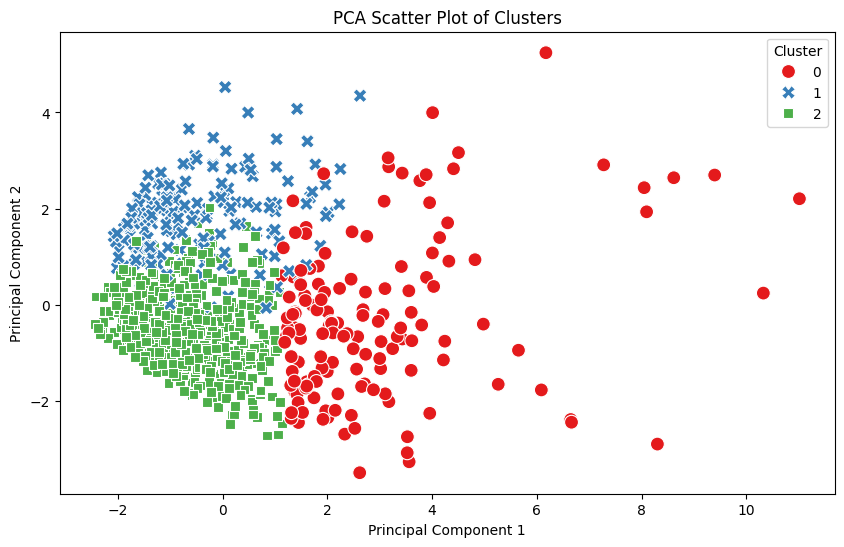

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Performing PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Creating a DataFrame to hold the PCA components and cluster labels
df_pca = pd.DataFrame(features_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plotting the PCA components in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set1',
    style='Cluster',  # Different markers for each cluster
    s=100  # Size of the markers
)

plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



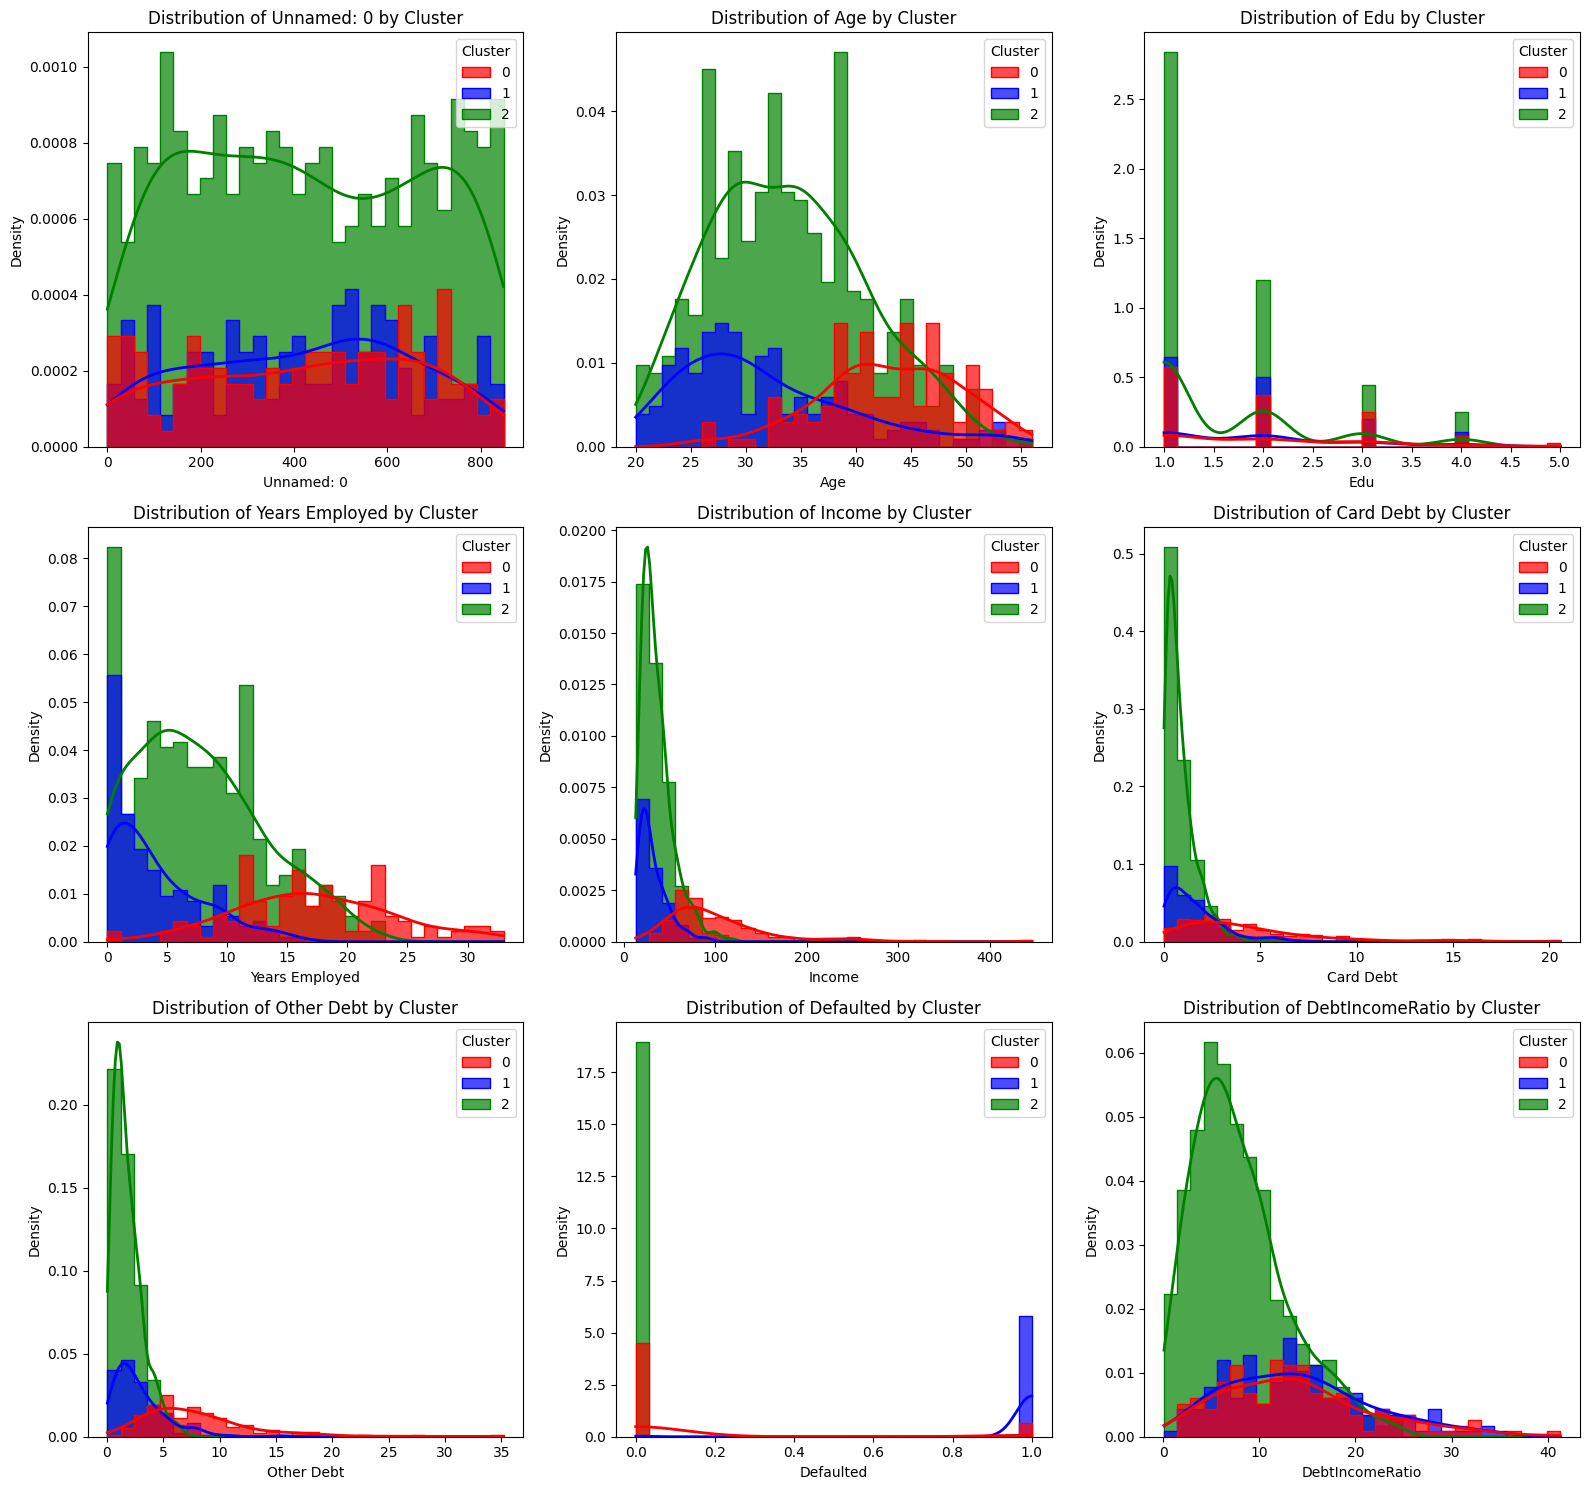

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define the color palette with red, green, and blue
palette = ['red', 'blue', 'green']

# Number of features
num_features = len(features.columns)

# Determine the number of rows and columns for subplots
n_cols = 3  # Number of columns
n_rows = math.ceil(num_features / n_cols)  # Number of rows

# Setting the figure size
plt.figure(figsize=(16, 5 * n_rows))

# Plotting each feature distribution as a histogram by cluster
for i, column in enumerate(features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    # Using sns.histplot to plot the histogram for each feature, with hue as the cluster label
    sns.histplot(
        data=df,
        x=column,
        hue='Cluster',
        bins=30,
        kde=True,
        element='step',
        stat='density',
        palette=palette,  # Applying the red, green, and blue colors
        alpha=0.7,  # Setting transparency for clearer overlapping
        line_kws={'linewidth': 2}  # Making KDE lines bolder
    )
    plt.title(f'Distribution of {column} by Cluster')

plt.tight_layout()
plt.show()



In [ ]:
# Grouping by 'Cluster' and calculating the mean for each feature
cluster_summary = df.groupby('Cluster').mean()

# Displaying the summary
print(cluster_summary)


         Unnamed: 0  Customer Id        Age       Edu  Years Employed  \
Cluster                                                                 
0        423.408163   424.408163  43.000000  1.931973       17.197279   
1        423.451807   424.451807  31.891566  1.861446        3.963855   
2        425.122905   426.122905  33.817505  1.603352        7.625698   

             Income  Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Cluster                                                                 
0        101.959184   4.220673    7.954483   0.129252        13.915646  
1         31.789157   1.576675    2.843355   0.987952        13.994578  
2         36.143389   0.853128    1.816855   0.000000         7.964991  


In [ ]:

# Count records for each combination of Cluster and Edu
cluster_edu_count = df.groupby(['Cluster', 'Edu']).size().reset_index(name='Count')

# Calculate the total count for each cluster
cluster_total = cluster_edu_count.groupby('Cluster')['Count'].sum().reset_index(name='TotalCount')

# Merge the total count back into the DataFrame
cluster_edu_count = pd.merge(cluster_edu_count, cluster_total, on='Cluster')

# Calculate the percentage for each Edu level within the cluster
cluster_edu_count['Percentage'] = (cluster_edu_count['Count'] / cluster_edu_count['TotalCount']) * 100

print(cluster_edu_count)


    Cluster  Edu  Count  TotalCount  Percentage
0         0    1     65         147   44.217687
1         0    2     42         147   28.571429
2         0    3     28         147   19.047619
3         0    4      9         147    6.122449
4         0    5      3         147    2.040816
5         1    1     73         166   43.975904
6         1    2     57         166   34.337349
7         1    3     23         166   13.855422
8         1    4     12         166    7.228916
9         1    5      1         166    0.602410
10        2    1    322         537   59.962756
11        2    2    136         537   25.325885
12        2    3     50         537    9.310987
13        2    4     28         537    5.214153
14        2    5      1         537    0.186220


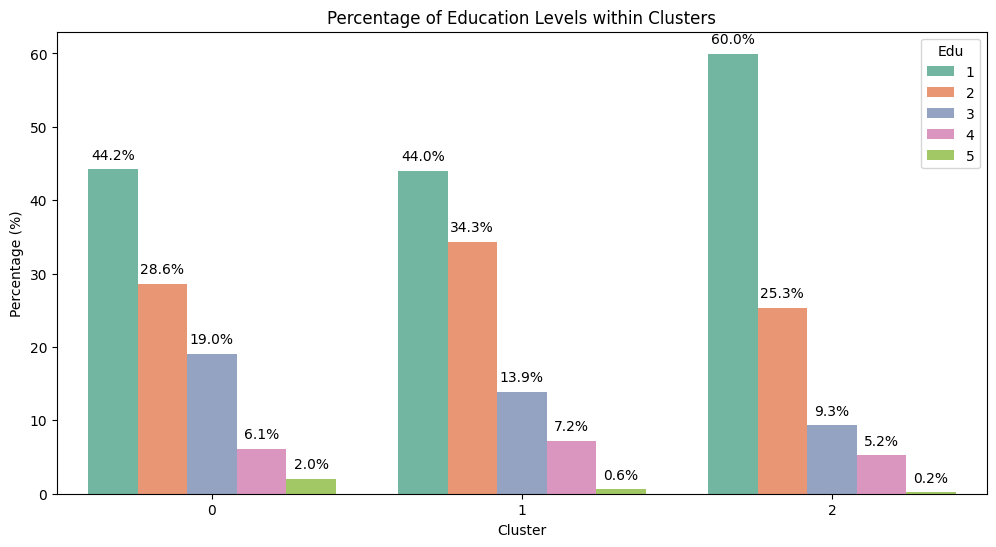

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data structure:
#   Cluster Edu Count TotalCount Percentage

# Define a custom color palette
colors = sns.color_palette("Set2", n_colors=len(cluster_edu_count['Edu'].unique()))

# Plotting the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Cluster', y='Percentage', hue='Edu', data=cluster_edu_count, palette=colors)

# Adding labels and title
plt.title('Percentage of Education Levels within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')

# Adding data labels on top of the bars, excluding 0.0%
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Check if height is greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center', va='bottom')

# Show the plot
plt.show()




In [ ]:

# Count records for each combination of Cluster and Defaulted
cluster_Defaulted_count = df.groupby(['Cluster', 'Defaulted']).size().reset_index(name='Count')


# Calculate the total count for each cluster
cluster_total = cluster_edu_count.groupby('Cluster')['Count'].sum().reset_index(name='TotalCount')

# Merge the total count back into the DataFrame
cluster_Defaulted_count = pd.merge(cluster_Defaulted_count, cluster_total, on='Cluster')

# Calculate the percentage for each Edu level within the cluster
cluster_Defaulted_count['Percentage'] = (cluster_Defaulted_count['Count'] / cluster_Defaulted_count['TotalCount']) * 100

print(cluster_Defaulted_count)

   Cluster  Defaulted  Count  TotalCount  Percentage
0        0        0.0    128         147   87.074830
1        0        1.0     19         147   12.925170
2        1        0.0      2         166    1.204819
3        1        1.0    164         166   98.795181
4        2        0.0    537         537  100.000000


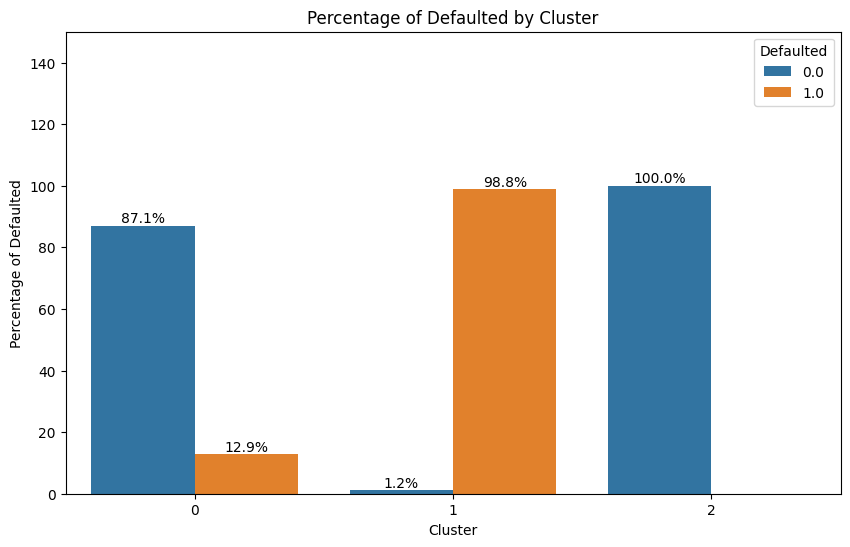

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(data=cluster_Defaulted_count, x='Cluster', y='Percentage', hue='Defaulted')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Percentage of Defaulted')
plt.title('Percentage of Defaulted by Cluster')
plt.ylim(0, 150)  # Assuming percentage values

# Adding value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns: 'Cluster', 'Edu', 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio'

# Group by 'Cluster' and calculate correlation
correlation_by_cluster = df.groupby('Cluster').apply(lambda x: x[['Edu', 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']].corr())

# Display correlation by cluster
print(correlation_by_cluster)


                              Edu  Defaulted    Income  Card Debt  Other Debt  \
Cluster                                                                         
0       Edu              1.000000   0.143860  0.277377   0.007617    0.066103   
        Defaulted        0.143860   1.000000  0.128287   0.601375    0.373006   
        Income           0.277377   0.128287  1.000000   0.289055    0.301180   
        Card Debt        0.007617   0.601375  0.289055   1.000000    0.430361   
        Other Debt       0.066103   0.373006  0.301180   0.430361    1.000000   
        DebtIncomeRatio -0.171365   0.425041 -0.436135   0.465190    0.501287   
1       Edu              1.000000  -0.074228  0.348597   0.070435    0.223558   
        Defaulted       -0.074228   1.000000  0.065182  -0.053093   -0.047887   
        Income           0.348597   0.065182  1.000000   0.500415    0.585582   
        Card Debt        0.070435  -0.053093  0.500415   1.000000    0.450782   
        Other Debt       0.2

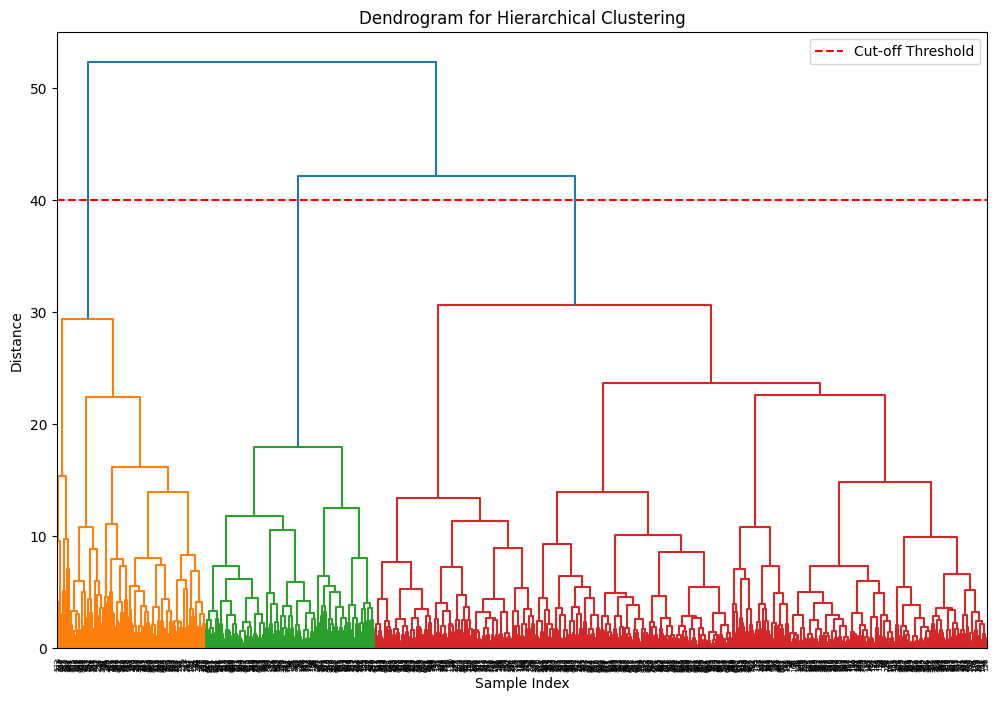

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Performing hierarchical clustering using 'ward' linkage method
Z = linkage(features_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Set the threshold to cut the dendrogram and draw a horizontal line
max_distance = 40  # Adjust this value based on the dendrogram plot
plt.axhline(y=max_distance, color='r', linestyle='--', label='Cut-off Threshold')

plt.legend()
plt.show()

# Cutting the dendrogram to form clusters
clusters = fcluster(Z, max_distance, criterion='distance')

# clusters now contains the cluster labels for each observation





**Hyperparameter Tuning with GridSearchCV**

**Tuned Logistic Regression Model**

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering
Z = linkage(features_scaled, method='ward')

# Define the number of clusters based on the dendrogram or other criteria
num_clusters = 3  # Adjust this number as needed

# Assign cluster labels based on the number of clusters
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Optionally, view the cluster summary
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)



         Unnamed: 0  Customer Id        Age       Edu  Years Employed  \
Cluster                                                                 
1        409.227941   410.227941  40.816176  2.102941       15.279412   
2        430.541935   431.541935  31.845161  1.793548        3.819355   
3        426.540250   427.540250  34.504472  1.592129        8.248658   

            Income  Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Cluster                                                                
1        97.838235   4.512941    8.322824   0.198529        15.938235  
2        30.180645   1.375381    2.593290   1.000000        13.473548  
3        38.801431   0.918342    1.937555   0.001789         7.853131  


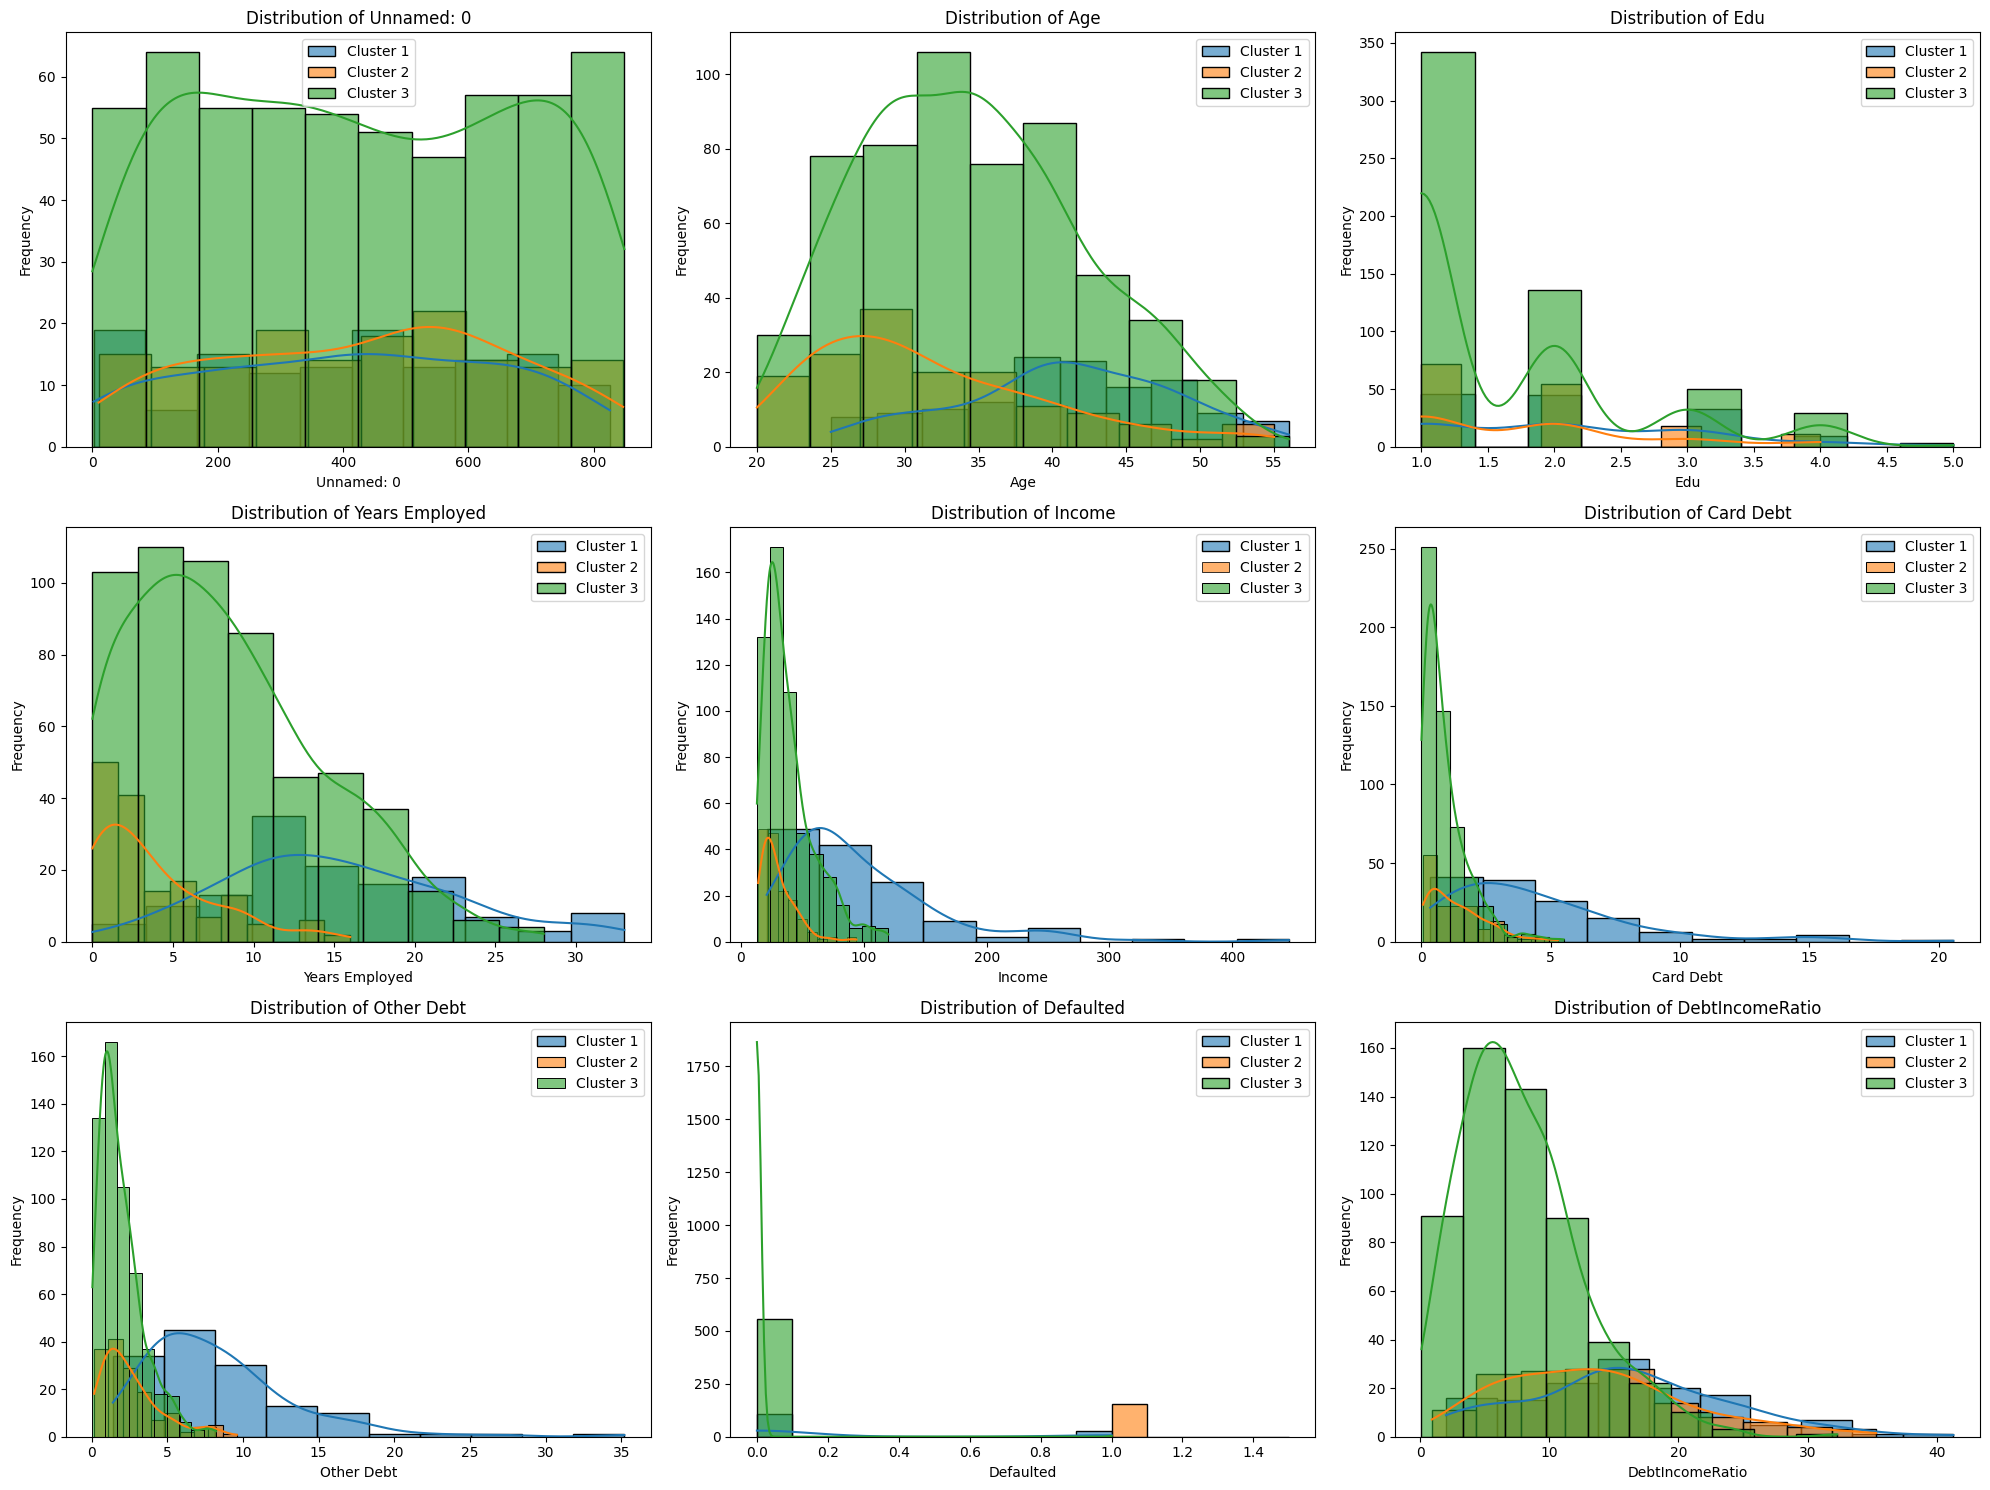

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of unique clusters
num_clusters = len(df['Cluster'].unique())

# List of feature columns to plot
features_list = features.columns

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = math.ceil(len(features_list) / n_cols)

# Create a figure with subplots
plt.figure(figsize=(20, 5 * n_rows))

# Plot histograms for each feature
for i, column in enumerate(features_list):
    plt.subplot(n_rows, n_cols, i + 1)
    for cluster in range(1, num_clusters + 1):  # Adjust range to match cluster labels
        sns.histplot(
            df[df['Cluster'] == cluster][column],
            kde=True,
            label=f'Cluster {cluster}',
            bins=10,
            alpha=0.6
        )
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()





In [ ]:

import pandas as pd

# Count records for each combination of Cluster and Defaulted
cluster_defaulted_count = df.groupby(['Cluster', 'Defaulted']).size().reset_index(name='Count')

# Calculate the total count for each cluster
cluster_total = cluster_defaulted_count.groupby('Cluster')['Count'].sum().reset_index(name='TotalCount')

# Merge the total count back into the DataFrame
cluster_defaulted_count = pd.merge(cluster_defaulted_count, cluster_total, on='Cluster')

# Calculate the percentage for each Defaulted level within the cluster
cluster_defaulted_count['Percentage'] = (cluster_defaulted_count['Count'] / cluster_defaulted_count['TotalCount']) * 100

print(cluster_defaulted_count)



   Cluster  Defaulted  Count  TotalCount  Percentage
0        1        0.0    109         136   80.147059
1        1        1.0     27         136   19.852941
2        2        1.0    155         155  100.000000
3        3        0.0    558         559   99.821109
4        3        1.0      1         559    0.178891


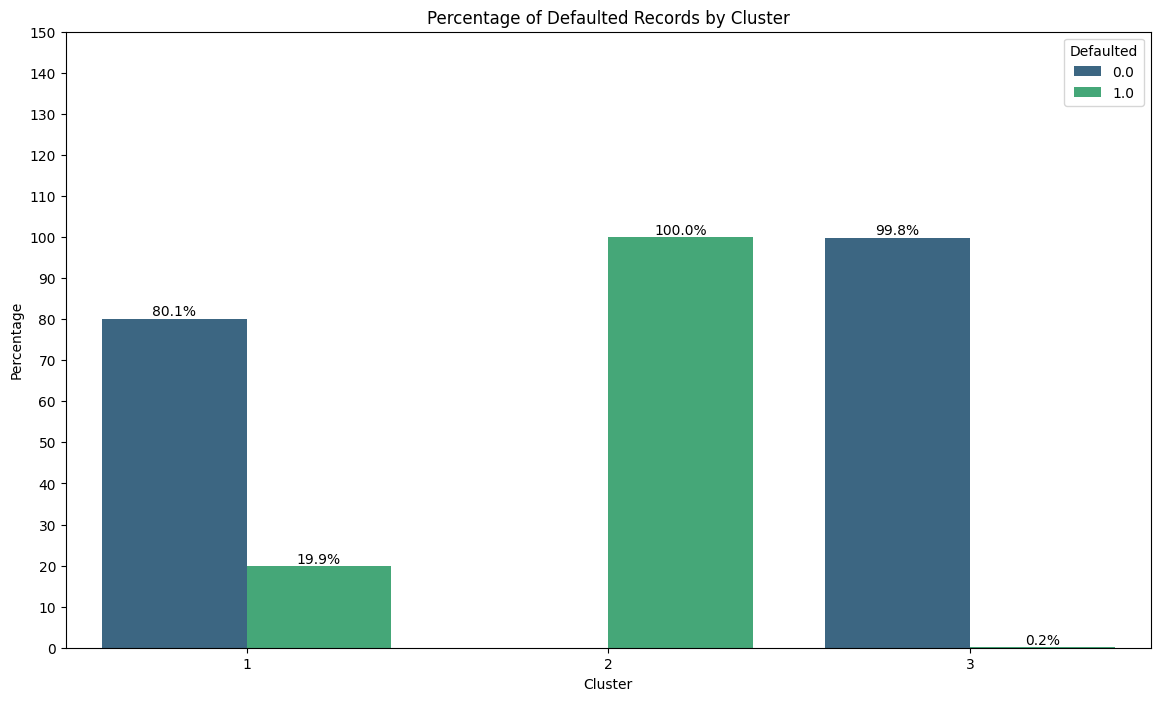

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Count records for each combination of Cluster and Defaulted
cluster_Defaulted_count = df.groupby(['Cluster', 'Defaulted']).size().reset_index(name='Count')

# Calculate the total count for each cluster
cluster_total = cluster_Defaulted_count.groupby('Cluster')['Count'].sum().reset_index(name='TotalCount')

# Merge the total count back into the DataFrame
cluster_Defaulted_count = pd.merge(cluster_Defaulted_count, cluster_total, on='Cluster')

# Calculate the percentage for each Defaulted status within the cluster
cluster_Defaulted_count['Percentage'] = (cluster_Defaulted_count['Count'] / cluster_Defaulted_count['TotalCount']) * 100

# Plotting the percentages
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=cluster_Defaulted_count, x='Cluster', y='Percentage', hue='Defaulted', palette='viridis')

# Add data labels on the bars
for p in ax.patches:
    if p.get_height() > 0:  # Check to avoid adding label to 0% bars
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.title('Percentage of Defaulted Records by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Defaulted')
plt.ylim(0, 150)  # Extend y-axis limit to 150%
plt.yticks(range(0, 151, 10))  # Set y-axis ticks, avoid including 0%
plt.show()



In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns: 'Cluster', 'Edu', 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio'

# Group by 'Cluster' and calculate correlation for the features within each cluster
def calculate_correlation(cluster_df):
    return cluster_df[['Edu', 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']].corr()

# Apply the correlation calculation to each cluster
correlation_by_cluster = df.groupby('Cluster').apply(calculate_correlation)

# Display the correlation matrices for each cluster
print(correlation_by_cluster)


                              Edu  Defaulted    Income  Card Debt  Other Debt  \
Cluster                                                                         
1       Edu              1.000000   0.149056  0.214533  -0.051933   -0.043684   
        Defaulted        0.149056   1.000000  0.043841   0.543664    0.272548   
        Income           0.214533   0.043841  1.000000   0.293788    0.332801   
        Card Debt       -0.051933   0.543664  0.293788   1.000000    0.401510   
        Other Debt      -0.043684   0.272548  0.332801   0.401510    1.000000   
        DebtIncomeRatio -0.277407   0.387988 -0.542353   0.374948    0.367579   
2       Edu              1.000000        NaN  0.260445  -0.037813    0.128768   
        Defaulted             NaN        NaN       NaN        NaN         NaN   
        Income           0.260445        NaN  1.000000   0.388484    0.530264   
        Card Debt       -0.037813        NaN  0.388484   1.000000    0.398322   
        Other Debt       0.1

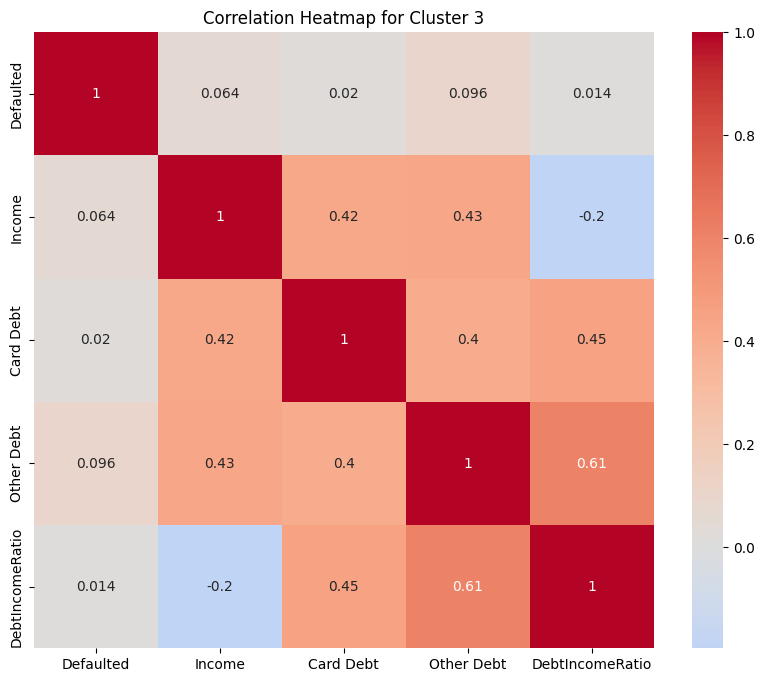

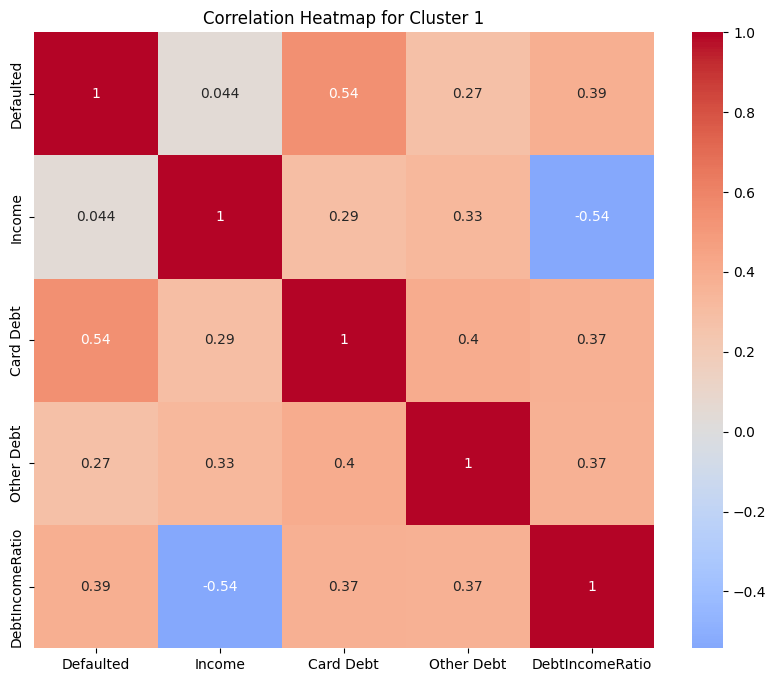

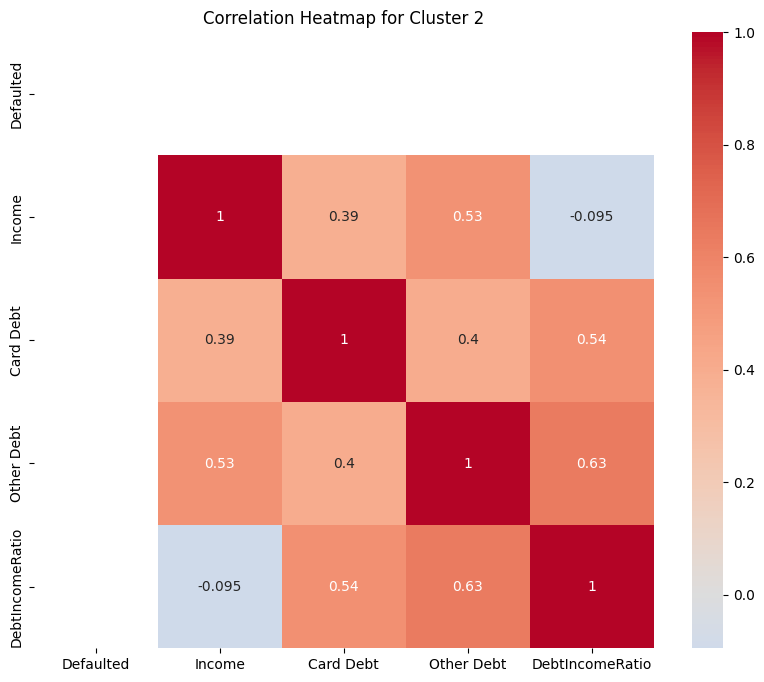

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns: 'Cluster', 'Edu', 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio'

# Function to calculate correlation for the features within each cluster
def calculate_correlation(cluster_df):
    return cluster_df[[ 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']].corr()

# Group by 'Cluster' and apply the correlation calculation to each cluster
correlation_by_cluster = df.groupby('Cluster').apply(calculate_correlation)

# Plot heatmap for each cluster
for cluster in df['Cluster'].unique():
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_by_cluster.loc[cluster], annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.show()


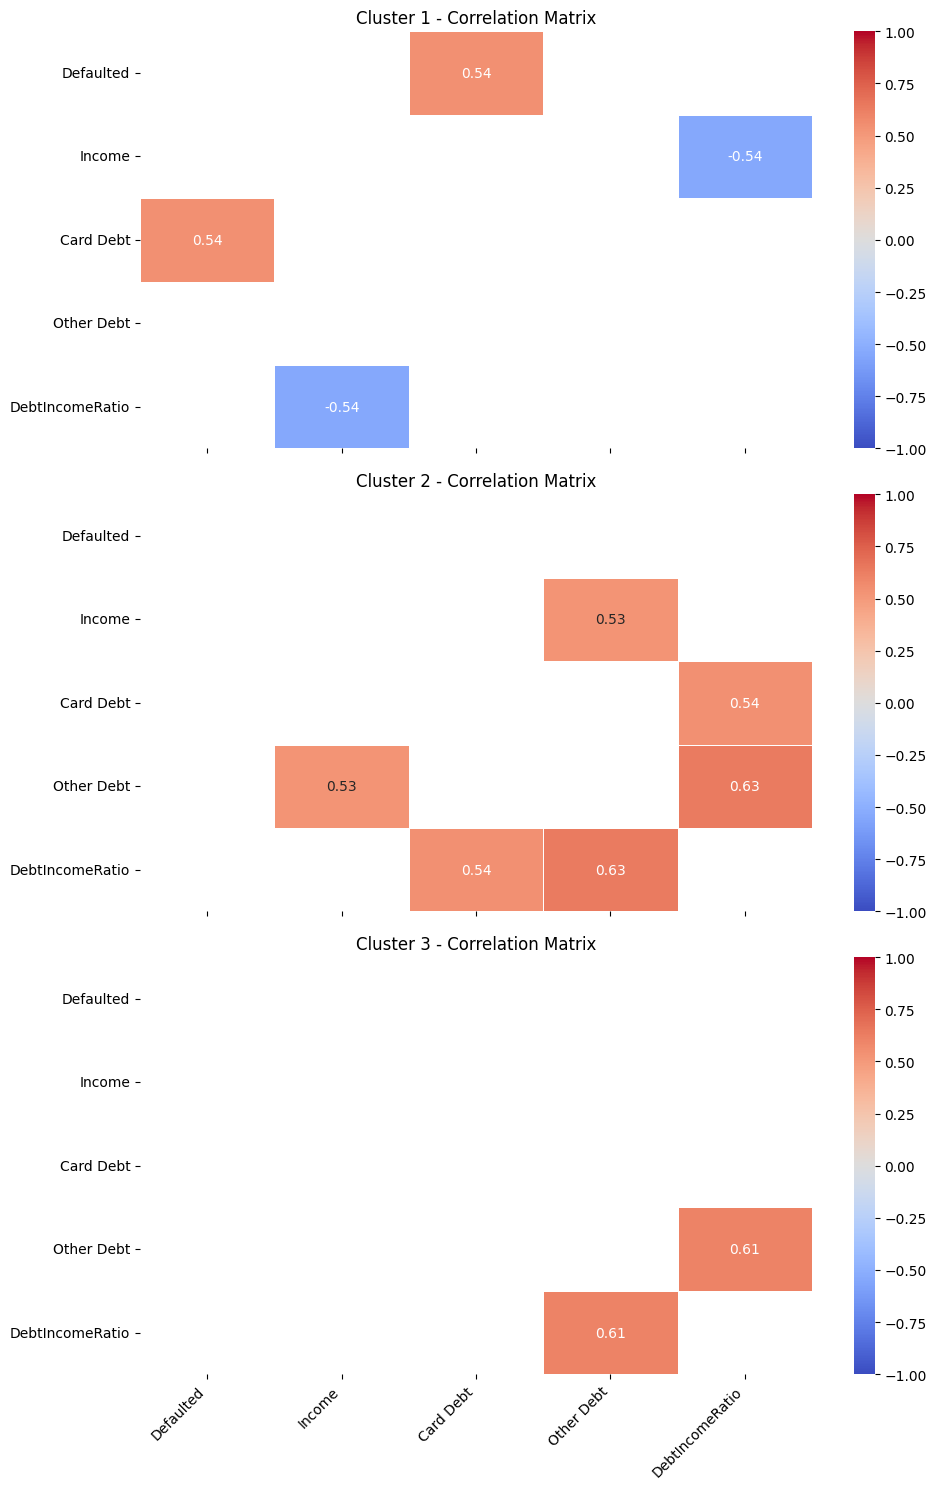

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and filter correlations
def get_significant_correlations(cluster_df, threshold=0.5):
    corr_matrix = cluster_df[[ 'Defaulted', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']].corr()
    significant_corr = corr_matrix[(corr_matrix.abs() >= threshold) & (corr_matrix.abs() < 1.0)]
    return significant_corr

# Apply the function to each cluster
correlation_by_cluster = df.groupby('Cluster').apply(get_significant_correlations)

# Remove clusters with no significant correlations
significant_clusters = [cluster for cluster, corr_matrix in correlation_by_cluster.groupby(level=0) if not corr_matrix.empty]

# Filter correlation matrices for significant clusters
filtered_correlation_by_cluster = correlation_by_cluster.loc[significant_clusters]

# Prepare for plotting
n_clusters = len(significant_clusters)
fig, axes = plt.subplots(n_clusters, 1, figsize=(10, 5 * n_clusters), sharex=True, sharey=True)

# Plot each cluster's significant correlations
for i, cluster in enumerate(significant_clusters):
    corr_matrix = filtered_correlation_by_cluster.loc[cluster]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[i], vmin=-1, vmax=1, linewidths=0.5)
    axes[i].set_title(f'Cluster {cluster} - Correlation Matrix')
    axes[i].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
    axes[i].set_yticklabels(corr_matrix.columns, rotation=0)

plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define significant correlations with a clearer structure
correlations = {
    'Cluster 1': {
        'Card Debt': [0.544],
        'Defaulted': [0.544]
    },
    'Cluster 2': {
        'Income': [0.530],
        'Other Debt': [0.530],
        'Card Debt': [0.541],
        'DebtIncomeRatio': [0.541, 0.635]
    },
    'Cluster 3': {
        'Other Debt': [0.605],
        'DebtIncomeRatio': [0.605]
    }
}

# Create dataframes for each cluster's significant correlations
corr_dfs = {}
for cluster, corr_dict in correlations.items():
    corr_list = []
    for key, values in corr_dict.items():
        for value in values:
            corr_list.append((key, value))

    corr_matrix = pd.DataFrame(corr_list, columns=['Feature', 'Correlation'])
    corr_matrix = corr_matrix.pivot(index='Feature', columns='Feature', values='Correlation')
    corr_matrix = corr_matrix.fillna(0)
    corr_dfs[cluster] = corr_matrix

# Plot correlation matrices
fig, axes = plt.subplots(len(corr_dfs), 1, figsize=(12, 5 * len(corr_dfs)), sharex=True, sharey=True)

for ax, (cluster, corr_matrix) in zip(axes, corr_dfs.items()):
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax, vmin=-1, vmax=1, linewidths=0.5)
    ax.set_title(f'Cluster {cluster} - Significant Correlations (>= 0.5)')
    ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
    ax.set_yticklabels(corr_matrix.index, rotation=0)

plt.tight_layout()
plt.show()


ValueError: The name Feature occurs multiple times, use a level number

In [2]:
import pandas as pd

# Creating a sample dataset for practicing descriptive statistics
data = {
    "ID": range(1, 21),
    "Age": [25, 30, 45, 50, 29, 34, 40, 28, 36, 41, 22, 33, 38, 26, 37, 42, 27, 31, 39, 35],
    "Salary": [40000, 50000, 75000, 80000, 45000, 52000, 60000, 47000, 58000, 62000,
               41000, 53000, 61000, 43000, 59000, 63000, 46000, 51000, 60500, 57500],
    "Department": ["HR", "IT", "Finance", "Marketing", "HR", "Finance", "IT", "Marketing", "Finance",
                   "IT", "HR", "Marketing", "IT", "Finance", "HR", "IT", "Marketing", "Finance", "HR", "IT"],
    "Experience (Years)": [2, 5, 10, 12, 4, 7, 8, 3, 6, 9, 1, 4, 8, 3, 6, 9, 2, 5, 7, 6]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Saving the dataset as an Excel file
file_path = '/content/Descriptive_Statistics_Practice.xlsx'
df.to_excel(file_path, index=False)

file_path


'/content/Descriptive_Statistics_Practice.xlsx'